In [1]:
# %matplotlib notebook
import pandas
from matplotlib import pyplot as plt
import mpl_finance
import matplotlib

# using ggplot style
matplotlib.style.use('ggplot')

In [2]:
def stockPricePlot(ticker):
    # step 1. load data
    history = pandas.read_csv('../Data/tickerListUS/Intraday/' + ticker + '.csv', parse_dates = True, index_col = 0)

    # step 2. data manipulate
    close = history['Close']
    # manipulate the time 
    close = close.reset_index()
    close['timestamp'] = close['timestamp'].map(matplotlib.dates.date2num)

    ohlc = history[['Open','High','Low','Close']].resample('1H').ohlc()
    ohlc = ohlc.reset_index()
    ohlc['timestamp'] = ohlc['timestamp'].map(matplotlib.dates.date2num)

    # step 3. plot figures. subplot 1: scatter plot. subplot 2: candle stick plot.
    # step 3.1 scatter plot
    subplot1 = plt.subplot2grid((2, 1), (0, 0), rowspan = 1, colspan = 1)
    subplot1.xaxis_date() # time axis
    subplot1.plot(close['timestamp'], close['Close'], 'b.')
    plt.title(ticker)

    # 3.2 candle stick
    # for US_Stock, green represents close price is greater than open price, red represents close price is lower than open price
    # for A_Stock, green represents close price is lower than open price, red represents close price is greater than open price
    subplot2 = plt.subplot2grid((2, 1), (1, 0), rowspan = 1, colspan = 1, sharex = subplot1)
    mpl_finance.candlestick_ohlc(ax = subplot2, quotes = ohlc.values, width = 0.01,
                    colorup = 'g', colordown = 'r')
    plt.show()

d:\language\python\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


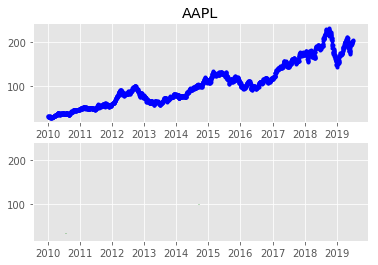

In [3]:
stockPricePlot('AAPL')